In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx
import matplotlib.pyplot as plt
import copy
import pprint

In [2]:
df1 = pd.read_csv('data_irregularities_yes_2.csv')
df1.head()

,requestor,goods_services,supplier,award_date,award_amount
0,requestor_a,maintain_facilities_a,supplier_aaa,1-Jan-24,150000.0000
1,requestor_a,maintain_facilities_a,supplier_bbb,1-Jan-24,150000.0000
2,requestor_a,maintain_facilities_a,supplier_c,1-Jan-24,109847.7126
3,requestor_a,maintain_facilities_a,supplier_aaa,1-Apr-24,150000.0000
4,requestor_a,maintain_facilities_a,supplier_bbb,1-Apr-24,150000.0000


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   requestor       48 non-null     object 
 1   goods_services  48 non-null     object 
 2   supplier        48 non-null     object 
 3   award_date      48 non-null     object 
 4   award_amount    48 non-null     float64
dtypes: float64(1), object(4)
memory usage: 2.0+ KB


In [4]:
df1['award_date_formatted'] = pd.to_datetime(df1['award_date'], format='%d-%b-%y', errors='coerce')
df1.head()

,requestor,goods_services,supplier,award_date,award_amount,award_date_formatted
0,requestor_a,maintain_facilities_a,supplier_aaa,1-Jan-24,150000.0000,2024-01-01
1,requestor_a,maintain_facilities_a,supplier_bbb,1-Jan-24,150000.0000,2024-01-01
2,requestor_a,maintain_facilities_a,supplier_c,1-Jan-24,109847.7126,2024-01-01
3,requestor_a,maintain_facilities_a,supplier_aaa,1-Apr-24,150000.0000,2024-04-01
4,requestor_a,maintain_facilities_a,supplier_bbb,1-Apr-24,150000.0000,2024-04-01


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   requestor             48 non-null     object        
 1   goods_services        48 non-null     object        
 2   supplier              48 non-null     object        
 3   award_date            48 non-null     object        
 4   award_amount          48 non-null     float64       
 5   award_date_formatted  48 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 2.4+ KB


In [6]:
df2 = pd.pivot_table(df1, index=['requestor','supplier'], values='award_amount', aggfunc='sum')
df2.head()

award_amount
requestor   supplier                  
requestor_a supplier_aaa   600000.0000
            supplier_bbb   600000.0000
            supplier_c     109847.7126
            supplier_f     108850.3677
            supplier_i     105992.0042

In [7]:
df3 = pd.DataFrame(df2.to_records())
df3.head()

,requestor,supplier,award_amount
0,requestor_a,supplier_aaa,600000.0000
1,requestor_a,supplier_bbb,600000.0000
2,requestor_a,supplier_c,109847.7126
3,requestor_a,supplier_f,108850.3677
4,requestor_a,supplier_i,105992.0042


In [8]:
df4 = df3.loc[df3['requestor']=='requestor_a']
df4.reset_index(drop=True, inplace=True)

In [9]:
G = nx.DiGraph()

In [10]:
for i in df4['requestor'].unique():
    G.add_node(i)
for i in df4['supplier'].unique():
    G.add_node(i)

print(G.nodes())
print()

['requestor_a', 'supplier_aaa', 'supplier_bbb', 'supplier_c', 'supplier_f', 'supplier_i', 'supplier_l']



In [11]:
width_list = []
for i in range(len(df4)):
    G.add_edge(df4.loc[i,'requestor'], df4.loc[i,'supplier'], weight=df4.loc[i,'award_amount'])
    width_list = width_list + [df4.loc[i,'award_amount']/100000]

print(G.edges(data=True))
print()

print(width_list)
print()

[('requestor_a', 'supplier_aaa', {'weight': 600000.0}), ('requestor_a', 'supplier_bbb', {'weight': 600000.0}), ('requestor_a', 'supplier_c', {'weight': 109847.7126}), ('requestor_a', 'supplier_f', {'weight': 108850.3677}), ('requestor_a', 'supplier_i', {'weight': 105992.0042}), ('requestor_a', 'supplier_l', {'weight': 108367.2597})]

[6.0, 6.0, 1.098477126, 1.088503677, 1.059920042, 1.0836725969999998]



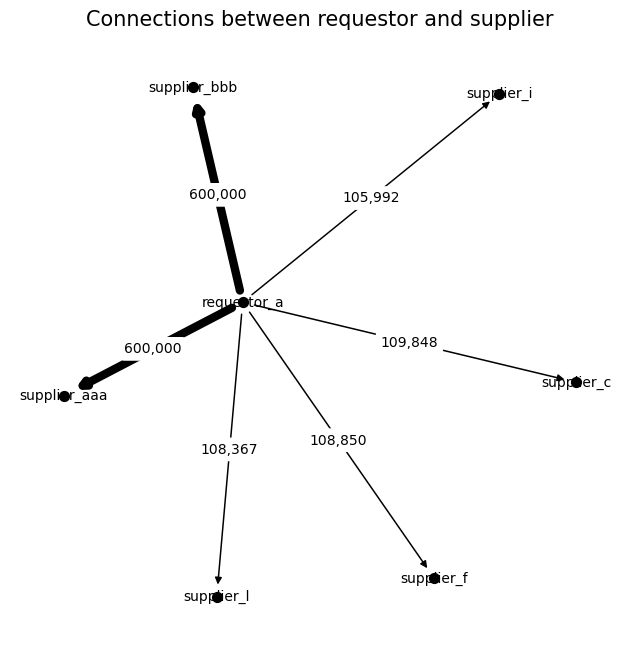

In [12]:
figure, axis = plt.subplots(1, 1, figsize=(8,8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='black')
nx.draw_networkx_edges(G, pos, width=width_list)
edge_label_s = {(u, v): f'{d["weight"]:,.0f}' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_label_s, rotate=False, font_size=10)
nx.draw_networkx_labels(G, pos, font_size=10);
plt.title('Connections between requestor and supplier', fontsize=15)
plt.box(False)

['requestor_b', 'supplier_a', 'supplier_b', 'supplier_c', 'supplier_d', 'supplier_e', 'supplier_f', 'supplier_g', 'supplier_h', 'supplier_i', 'supplier_j', 'supplier_k', 'supplier_l']

[('requestor_b', 'supplier_a', {'weight': 109993.8963}), ('requestor_b', 'supplier_b', {'weight': 102370.0674}), ('requestor_b', 'supplier_c', {'weight': 105928.8308}), ('requestor_b', 'supplier_d', {'weight': 100822.1686}), ('requestor_b', 'supplier_e', {'weight': 101537.5225}), ('requestor_b', 'supplier_f', {'weight': 101889.0957}), ('requestor_b', 'supplier_g', {'weight': 102280.6482}), ('requestor_b', 'supplier_h', {'weight': 104947.0504}), ('requestor_b', 'supplier_i', {'weight': 105889.7671}), ('requestor_b', 'supplier_j', {'weight': 109843.7452}), ('requestor_b', 'supplier_k', {'weight': 101811.2735}), ('requestor_b', 'supplier_l', {'weight': 106895.9624})]

[1.0999389629999998, 1.023700674, 1.059288308, 1.008221686, 1.015375225, 1.018890957, 1.022806482, 1.0494705039999999, 1.058897671, 1.0984374

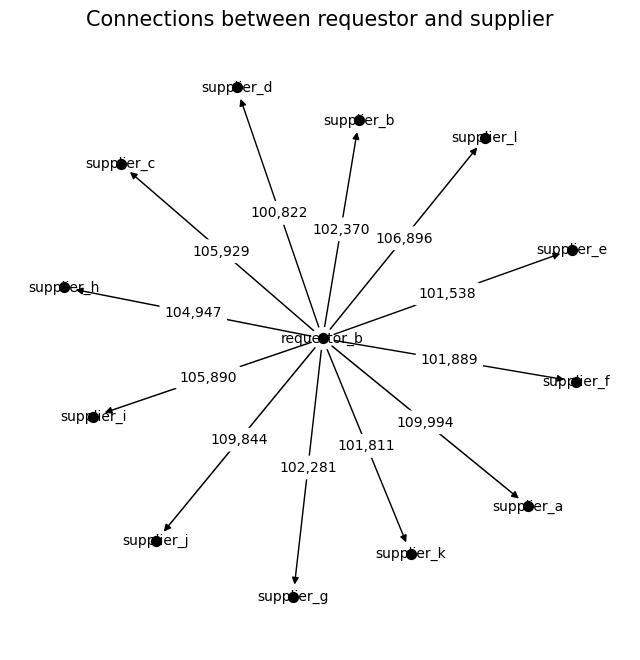

In [13]:
df4 = df3.loc[df3['requestor']=='requestor_b']
df4.reset_index(drop=True, inplace=True)

G = nx.DiGraph()

for i in df4['requestor'].unique():
    G.add_node(i)
for i in df4['supplier'].unique():
    G.add_node(i)

print(G.nodes())
print()

width_list = []
for i in range(len(df4)):
    G.add_edge(df4.loc[i,'requestor'], df4.loc[i,'supplier'], weight=df4.loc[i,'award_amount'])
    width_list = width_list + [df4.loc[i,'award_amount']/100000]

print(G.edges(data=True))
print()

print(width_list)
print()

figure, axis = plt.subplots(1, 1, figsize=(8,8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='black')
nx.draw_networkx_edges(G, pos, width=width_list)
edge_label_s = {(u, v): f'{d["weight"]:,.0f}' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_label_s, rotate=False, font_size=10)
nx.draw_networkx_labels(G, pos, font_size=10);
plt.title('Connections between requestor and supplier', fontsize=15)
plt.box(False)

['requestor_c', 'supplier_a', 'supplier_b', 'supplier_c', 'supplier_d', 'supplier_e', 'supplier_f', 'supplier_g', 'supplier_h', 'supplier_i', 'supplier_j', 'supplier_k', 'supplier_l']

[('requestor_c', 'supplier_a', {'weight': 106253.2426}), ('requestor_c', 'supplier_b', {'weight': 106628.0099}), ('requestor_c', 'supplier_c', {'weight': 108321.7872}), ('requestor_c', 'supplier_d', {'weight': 105309.6103}), ('requestor_c', 'supplier_e', {'weight': 101572.924}), ('requestor_c', 'supplier_f', {'weight': 105803.7049}), ('requestor_c', 'supplier_g', {'weight': 104940.9467}), ('requestor_c', 'supplier_h', {'weight': 104359.5691}), ('requestor_c', 'supplier_i', {'weight': 103655.2019}), ('requestor_c', 'supplier_j', {'weight': 103987.8536}), ('requestor_c', 'supplier_k', {'weight': 100710.1657}), ('requestor_c', 'supplier_l', {'weight': 105248.5733})]

[1.062532426, 1.066280099, 1.083217872, 1.053096103, 1.01572924, 1.058037049, 1.049409467, 1.043595691, 1.036552019, 1.039878536, 1.007101657,

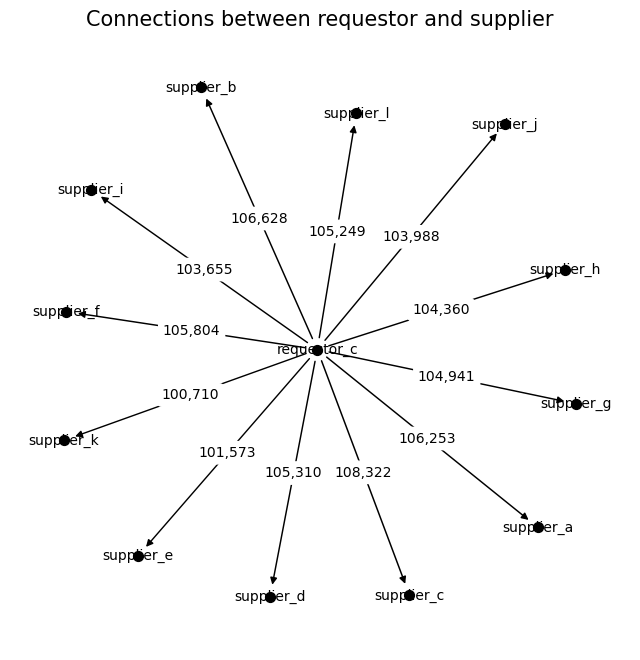

In [14]:
df4 = df3.loc[df3['requestor']=='requestor_c']
df4.reset_index(drop=True, inplace=True)

G = nx.DiGraph()

for i in df4['requestor'].unique():
    G.add_node(i)
for i in df4['supplier'].unique():
    G.add_node(i)

print(G.nodes())
print()

width_list = []
for i in range(len(df4)):
    G.add_edge(df4.loc[i,'requestor'], df4.loc[i,'supplier'], weight=df4.loc[i,'award_amount'])
    width_list = width_list + [df4.loc[i,'award_amount']/100000]

print(G.edges(data=True))
print()

print(width_list)
print()

figure, axis = plt.subplots(1, 1, figsize=(8,8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='black')
nx.draw_networkx_edges(G, pos, width=width_list)
edge_label_s = {(u, v): f'{d["weight"]:,.0f}' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_label_s, rotate=False, font_size=10)
nx.draw_networkx_labels(G, pos, font_size=10);
plt.title('Connections between requestor and supplier', fontsize=15)
plt.box(False)

['requestor_d', 'supplier_a', 'supplier_b', 'supplier_c', 'supplier_d', 'supplier_e', 'supplier_f', 'supplier_g', 'supplier_h', 'supplier_i', 'supplier_j', 'supplier_k', 'supplier_l']

[('requestor_d', 'supplier_a', {'weight': 108917.5085}), ('requestor_d', 'supplier_b', {'weight': 106854.7624}), ('requestor_d', 'supplier_c', {'weight': 108825.3426}), ('requestor_d', 'supplier_d', {'weight': 102729.2703}), ('requestor_d', 'supplier_e', {'weight': 105078.5852}), ('requestor_d', 'supplier_f', {'weight': 100314.3406}), ('requestor_d', 'supplier_g', {'weight': 109353.618}), ('requestor_d', 'supplier_h', {'weight': 108207.0376}), ('requestor_d', 'supplier_i', {'weight': 108104.1902}), ('requestor_d', 'supplier_j', {'weight': 100929.2886}), ('requestor_d', 'supplier_k', {'weight': 104234.138}), ('requestor_d', 'supplier_l', {'weight': 105985.2901})]

[1.089175085, 1.068547624, 1.088253426, 1.027292703, 1.050785852, 1.003143406, 1.09353618, 1.082070376, 1.081041902, 1.009292886, 1.04234138, 1

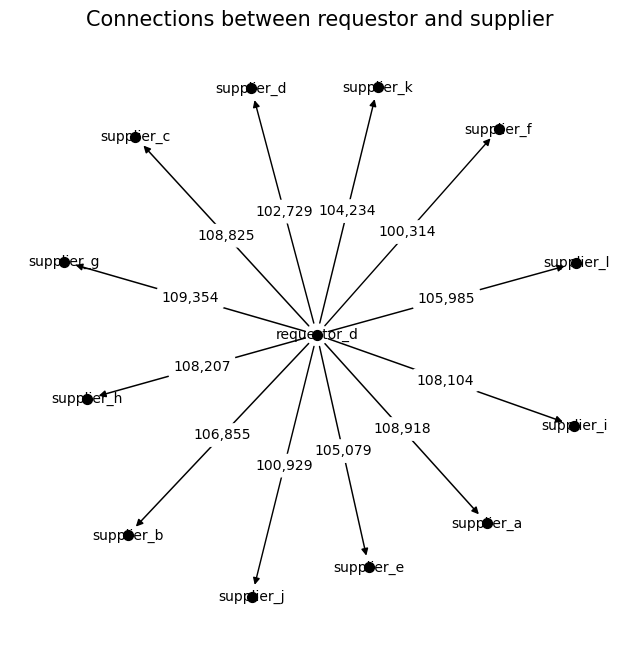

In [15]:
df4 = df3.loc[df3['requestor']=='requestor_d']
df4.reset_index(drop=True, inplace=True)

G = nx.DiGraph()

for i in df4['requestor'].unique():
    G.add_node(i)
for i in df4['supplier'].unique():
    G.add_node(i)

print(G.nodes())
print()

width_list = []
for i in range(len(df4)):
    G.add_edge(df4.loc[i,'requestor'], df4.loc[i,'supplier'], weight=df4.loc[i,'award_amount'])
    width_list = width_list + [df4.loc[i,'award_amount']/100000]

print(G.edges(data=True))
print()

print(width_list)
print()

figure, axis = plt.subplots(1, 1, figsize=(8,8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='black')
nx.draw_networkx_edges(G, pos, width=width_list)
edge_label_s = {(u, v): f'{d["weight"]:,.0f}' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_label_s, rotate=False, font_size=10)
nx.draw_networkx_labels(G, pos, font_size=10);
plt.title('Connections between requestor and supplier', fontsize=15)
plt.box(False)